# PHASE 1: Feedback Analyzer

🔹 Sample Feedback with Sentiment & Cluster:
  variant                                 feedback sentiment_label  cluster
0       A            The sign-up page is confusing        Negative        0
1       B             I love the layout and colors        Positive        0
2       A               Too many steps to register        Positive        0
3       B         The process was smooth and clear        Positive        0
4       A  Loading takes forever and frustrates me         Neutral        0
5       B          I really enjoyed the new design        Positive        0
6       A    It’s hard to find where to click next        Negative        0
7       B    This version feels intuitive and fast        Positive        1


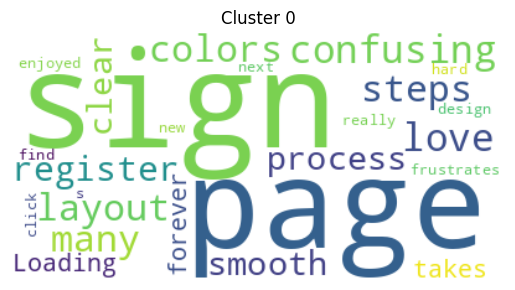

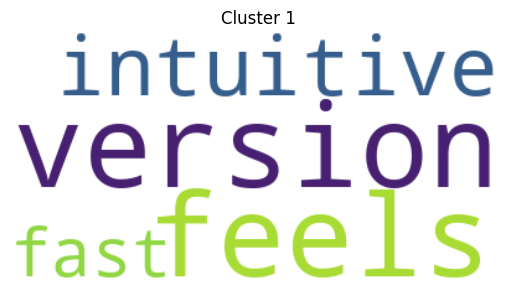

In [ ]:
# Install required packages
!pip install textblob wordcloud scikit-learn nltk

import pandas as pd
from io import StringIO
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Simulate feedback CSV
data = StringIO("""
user_id,variant,feedback
u001,A,The sign-up page is confusing
u002,B,I love the layout and colors
u003,A,Too many steps to register
u004,B,The process was smooth and clear
u005,A,Loading takes forever and frustrates me
u006,B,I really enjoyed the new design
u007,A,It’s hard to find where to click next
u008,B,This version feels intuitive and fast
""")

df = pd.read_csv(data)

# Sentiment analysis
df["sentiment"] = df["feedback"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment_label"] = df["sentiment"].apply(
    lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral")
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df["feedback"])

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Print insights
print("🔹 Sample Feedback with Sentiment & Cluster:")
print(df[["variant", "feedback", "sentiment_label", "cluster"]])

# WordClouds by cluster
for i in df["cluster"].unique():
    words = " ".join(df[df["cluster"]==i]["feedback"])
    wordcloud = WordCloud(background_color='white').generate(words)
    plt.figure()
    plt.title(f"Cluster {i}")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()


# PHASE 2: Variant Text Comparator

In [ ]:
# Install required packages
!pip install spacy textstat textblob
!python -m spacy download en_core_web_md

import pandas as pd
from io import StringIO
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import textstat

# Load spaCy model (medium)
nlp = spacy.load("en_core_web_md")

# Simulate variant copy data
copy_data = StringIO("""
variant,headline,description
A,Try Free for 7 Days,Get started with your free trial
B,Start Your Free Trial,Explore all features risk-free
""")

df = pd.read_csv(copy_data)

# Combine headline + description
df["full_text"] = df["headline"] + ". " + df["description"]

# Semantic similarity
doc_A = nlp(df.loc[0, "full_text"])
doc_B = nlp(df.loc[1, "full_text"])
similarity_score = doc_A.similarity(doc_B)

# Readability scores
df["readability_score"] = df["full_text"].apply(textstat.flesch_reading_ease)

# Tone polarity
df["tone_polarity"] = df["full_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display results
print("🔍 Semantic Similarity (A vs B):", round(similarity_score, 3))
print("\n📝 Readability Scores:\n", df[["variant", "readability_score"]])
print("\n🎯 Tone Polarity:\n", df[["variant", "tone_polarity"]])
print("\n📋 Copy Text:\n", df[["variant", "full_text"]])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 53.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
🔍 Semantic Similarity (A vs B): 0.891

📝 Readability Scores:
   variant  readability_score
0       A              99.73
1       B              75.88

🎯 Tone Polarity:
   variant  tone_polarity
0       A            0.4
1       B            0.4

📋 Copy Text:
   variant                                          full_text
0       A  Try Free for 7 Days. Get started with your fre...
1       B  Start Your Free Trial. Explore all features ri...


# PHASE 3: Experiment Log Summarizer

In [ ]:
log_text = """
On March 1, 2025, we launched a new onboarding flow as part of an A/B test.
The original design (Variant A) had a multi-step sign-up. Variant B simplified this into a single step.
Our goal was to improve conversion on mobile devices.
Early results showed a 2.5% uplift in conversion with Variant B and lower bounce rates.
However, qualitative feedback indicated some confusion in understanding benefits without additional context.
This will guide our next test iteration focusing on explanatory copy within the new flow.
"""


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # 👈 weird dependency that sumy mistakenly tries to fetch


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer

log_text = """
On March 1, 2025, we launched a new onboarding flow as part of an A/B test.
The original design (Variant A) had a multi-step sign-up. Variant B simplified this into a single step.
Our goal was to improve conversion on mobile devices.
Early results showed a 2.5% uplift in conversion with Variant B and lower bounce rates.
However, qualitative feedback indicated some confusion in understanding benefits without additional context.
This will guide our next test iteration focusing on explanatory copy within the new flow.
"""

parser = PlaintextParser.from_string(log_text, Tokenizer("english"))
summarizer = TextRankSummarizer()

# 1-Liner Summary
one_line_summary = list(summarizer(parser.document, 1))
if one_line_summary:
    print("📌 1-Liner Summary:")
    print("-", one_line_summary[0])
else:
    print("No summary generated.")

# 3-Line Summary
print("\n📄 3-Line Summary:")
for sentence in summarizer(parser.document, 3):
    print("-", sentence)


📌 1-Liner Summary:
- Early results showed a 2.5% uplift in conversion with Variant B and lower bounce rates.

📄 3-Line Summary:
- The original design (Variant A) had a multi-step sign-up.
- Early results showed a 2.5% uplift in conversion with Variant B and lower bounce rates.
- This will guide our next test iteration focusing on explanatory copy within the new flow.


# Phase 4: Metrics → Narrative Generator

In [ ]:
import pandas as pd
from io import StringIO

# Simulate A/B test result data
csv_data = StringIO("""
variant,conversion_rate,uplift,p_value,bounce_rate
A,0.12,0.0,-,0.65
B,0.145,0.025,0.04,0.60
""")

df = pd.read_csv(csv_data)


In [ ]:
# Get rows for variant A and B
variant_a = df[df['variant'] == 'A'].iloc[0]
variant_b = df[df['variant'] == 'B'].iloc[0]

# Format values
conv_a = round(variant_a['conversion_rate'] * 100, 1)
conv_b = round(variant_b['conversion_rate'] * 100, 1)
uplift = round(variant_b['uplift'] * 100, 1)
p_value = variant_b['p_value']
bounce_a = round(variant_a['bounce_rate'] * 100, 1)
bounce_b = round(variant_b['bounce_rate'] * 100, 1)

# Narrative (Formal)
formal_summary = (
    f"Variant B outperformed Variant A with a {uplift}% uplift in conversion rate "
    f"({conv_b}% vs {conv_a}%). "
    f"The improvement was statistically significant with a p-value of {p_value}. "
    f"Bounce rate also dropped from {bounce_a}% to {bounce_b}%, indicating stronger user engagement."
)

# TLDR Version
tldr = (
    f"✅ {uplift}% conversion lift with Variant B\n"
    f"📉 Bounce rate dropped from {bounce_a}% → {bounce_b}%\n"
    f"📊 p-value = {p_value} → Statistically significant"
)

# Output
print("📋 Formal Summary:\n", formal_summary)
print("\n⚡ TL;DR Summary:\n", tldr)


📋 Formal Summary:
 Variant B outperformed Variant A with a 2.5% uplift in conversion rate (14.5% vs 12.0%). The improvement was statistically significant with a p-value of 0.04. Bounce rate also dropped from 65.0% to 60.0%, indicating stronger user engagement.

⚡ TL;DR Summary:
 ✅ 2.5% conversion lift with Variant B
📉 Bounce rate dropped from 65.0% → 60.0%
📊 p-value = 0.04 → Statistically significant


Conversion Rate Comparison

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


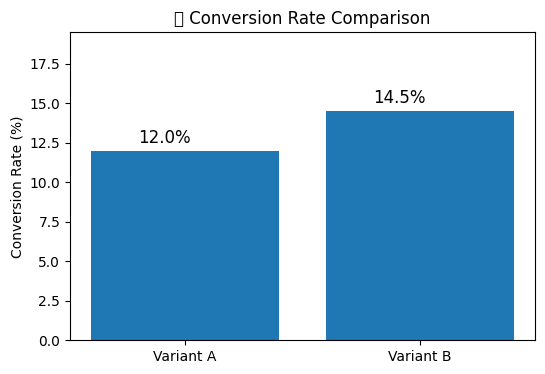

In [ ]:
import matplotlib.pyplot as plt

variants = ['Variant A', 'Variant B']
conversion = [conv_a, conv_b]

plt.figure(figsize=(6,4))
bars = plt.bar(variants, conversion)
plt.title("🔁 Conversion Rate Comparison")
plt.ylabel("Conversion Rate (%)")

# Label bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.2, yval + 0.5, f"{yval:.1f}%", fontsize=12)

plt.ylim(0, max(conversion)+5)
plt.show()


Bounce Rate Drop

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


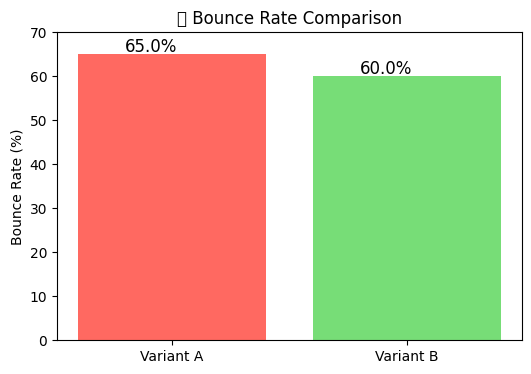

In [ ]:
bounce = [bounce_a, bounce_b]

plt.figure(figsize=(6,4))
bars = plt.bar(variants, bounce, color=["#FF6961", "#77DD77"])
plt.title("📉 Bounce Rate Comparison")
plt.ylabel("Bounce Rate (%)")

# Label bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.2, yval + 0.5, f"{yval:.1f}%", fontsize=12)

plt.ylim(0, max(bounce)+5)
plt.show()


Stylized Gradient Output for the Narrative

In [ ]:
from IPython.display import display, Markdown

styled_summary = f"""
<div style="background: linear-gradient(90deg, #ffecd2 0%, #fcb69f 100%);
            border-radius: 10px; padding: 15px; font-size: 16px; font-family: 'Arial';">
    <strong>📊 Experiment Summary:</strong><br>
    {formal_summary}<br><br>
    <strong>⚡ TL;DR:</strong><br>
    ✅ {uplift}% conversion lift<br>
    📉 Bounce rate: {bounce_a}% → {bounce_b}%<br>
    📊 p-value = {p_value} → Statistically significant
</div>
"""

display(Markdown(styled_summary))



<div style="background: linear-gradient(90deg, #ffecd2 0%, #fcb69f 100%);
            border-radius: 10px; padding: 15px; font-size: 16px; font-family: 'Arial';">
    <strong>📊 Experiment Summary:</strong><br>
    Variant B outperformed Variant A with a 2.5% uplift in conversion rate (14.5% vs 12.0%). The improvement was statistically significant with a p-value of 0.04. Bounce rate also dropped from 65.0% to 60.0%, indicating stronger user engagement.<br><br>
    <strong>⚡ TL;DR:</strong><br>
    ✅ 2.5% conversion lift<br>
    📉 Bounce rate: 65.0% → 60.0%<br>
    📊 p-value = 0.04 → Statistically significant
</div>
